In [4]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt # type: ignore
from matplotlib.animation import FuncAnimation # type: ignore
import seaborn as sns # type: ignore
import pandas as pd

# %matplotlib inline

# sns.set_style(style='whitegrid')
# plt.rcParams["path.force_edgecolor"] = True

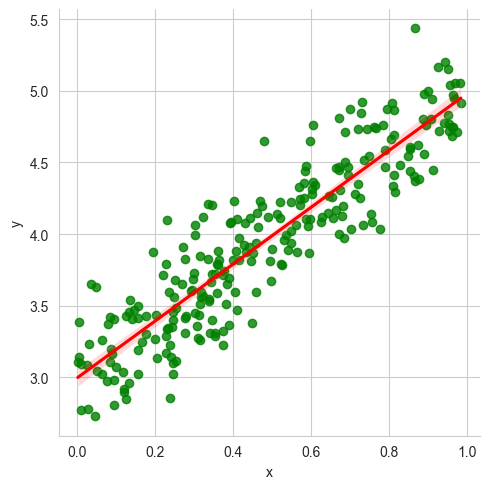

In [39]:
m=2
c=3
x = np.random.rand(256)

noise = np.random.randn(256) / 4

y = x*m + c + noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

sns.lmplot(x='x',y='y',data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'});

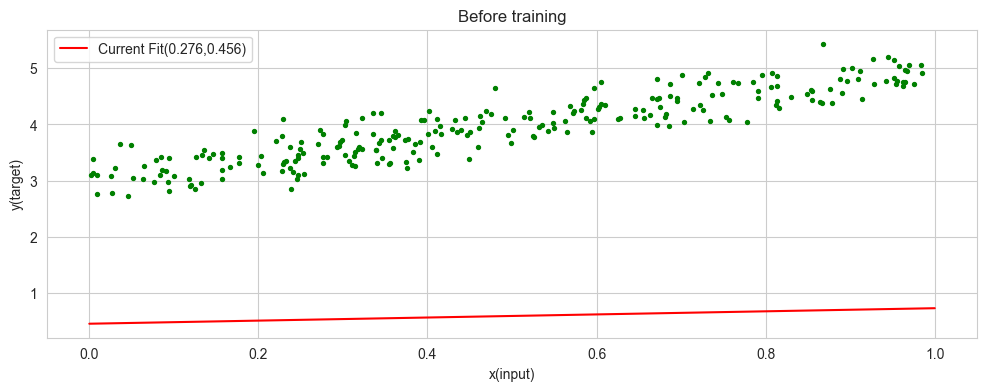

In [56]:
import torch
import torch.nn as nn
from torch.autograd import Variable
x_train = x.reshape(-1,1).astype('float32')
y_train = y.reshape(-1,1).astype('float32')


class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)


    def forward(self, x):
        out = self.linear(x)
        return out
    
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
input_dim, output_dim = (1,1)
model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()
[w,b] = model.parameters()

def get_param_values():
    return w.data[0][0], b.data[0]

def plot_current_fit(title=""):
    plt.figure(figsize=(12,4))
    plt.title(title)
    plt.scatter(x,y,s=8,color="green")
    w1 = w.data[0][0].item()
    b1 = b.data[0].item()
    x1 = np.array([0., 1.])
    y1 = x1 * w1 + b1
    plt.plot(x1,y1,'r',label='Current Fit({:.3f},{:.3f})'.format(w1,b1))
    plt.xlabel('x(input)')
    plt.ylabel('y(target)')
    plt.legend()
    plt.show()

plot_current_fit('Before training')